In [1]:
import editdistance as ed
import numpy as np
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
with open("../data/Sasha/Sasha1.fasta") as f:
    lines = [x[:31] for x in f.readlines()][1::2]

In [4]:
lines[:3]

['TGGAGCATTATGTTTTTAGGTTACGGAGCAA',
 'GGTGATAGTGGAAGTTTTACTTATACTTGGC',
 'ACAAGAGGTTTTTCAGCAATATATGTACTTC']

In [5]:
with open("../data/Sasha/Sasha1_pairs.txt") as f:
    pairs = [[y[:31] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [6]:
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])

In [7]:
from collections import Counter, OrderedDict

In [8]:
counter = Counter(lines)
ord_dict = OrderedDict()

In [9]:
u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

In [10]:
args_s = np.argsort(counts)[::-1]

In [11]:
for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [12]:
sp_to_n = {}

In [13]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = -1
    for comp_item in d.items():
        dist = ed.eval(init_item[0], comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [14]:
od = OrderedDict({"aaa" : 10, "acb" : 3, "aac" : 1, "xyc" : 1})

In [15]:
   
def squash(od, t):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in od.items():
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
#             min_ed = t
#             answ_item = -1
#             for comp_item in answ.items():
#                 dist = ed.eval(init_item[0], comp_item[0])
#                 if dist < min_ed:
#                     min_ed = dist
#                     answ_item = comp_item

#             if min_ed < t:
#                 answ[answ_item[0]] += init_item[1]
#                 sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
#                 print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
#             else:
#                 sp_to_n[init_item[0]] = index
#                 index += 1
#                 answ[init_item[0]] = init_item[1]
#                 print("new spacer:", init_item[0], init_item[1])
            min_ed, answ_item = find_closest(answ, init_item, t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [16]:
squash(od, 3)

new spacer: aaa 10
add: acb to aaa 13
add: aac to aaa 14
new spacer: xyc 1


(OrderedDict([('aaa', 14), ('xyc', 1)]),
 {'aaa': 0, 'aac': 0, 'acb': 0, 'xyc': 1})

In [17]:
nd, sp_to_n = squash(ord_dict, 6)

new spacer: GGTGATAGTGGAAGTTTTACTTATACTTGGC 9951
new spacer: TTCAGAATACTTAGCTCCTGCGCCTATATCG 7731
new spacer: TGGAGCATTATGTTTTTAGGTTACGGAGCAA 6849
new spacer: AAAGTTTTGCGCATTGTATGTGTGCCTAGAT 4655
new spacer: GTTTTAGAACAGAAAAAATTGTATAAATTGT 4482
new spacer: AGGTCAAGCATAGATTTTGCAACTGGAAGAT 4212
new spacer: GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4027
new spacer: ACTAAACCTTTTTGTTTACTTTTATTTCTCA 2972
new spacer: CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2686
new spacer: TATTTTACAGATGAACAATTACAGTTACTTC 2669
new spacer: TGTAAAAATATTGCTTAGCATATTGATATCA 2583
new spacer: AGACTCGACATAGAATCGGTTACTAAATCCG 2554
new spacer: TTGTAAAATGTAAATAGCATATTAATTTTTC 2549
new spacer: TTGGTTAACTTAAGTGCTATGAAAGGAATTA 2499
new spacer: AGTACATATAATGAGTCTTTAACATCAGTTA 2369
new spacer: CCAACCCTTCGCACGAATCCGTGCGACGAAA 2326
new spacer: ACAGCTCCCAAGACATACAACGAATCTGTAA 2325
new spacer: TCATCAATATTAATTTTGGGAATATCAACAT 2313
new spacer: ACAAGAGGTTTTTCAGCAATATATGTACTTC 2278
new spacer: AGTAATTCCATGCAATCTTTTATATTGCTTT 2270
new spacer: ACGAAATT

add: GGTGGTAGTGGAAGTTTTACTTATACTTGGC to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10295
add: CCAACCCTCCGCACGAATCCGTGCGACGAAA to CCAACCCTTCGCACGAATCCGTGCGACGAAA 2338
add: TGTAAAAATATCGCTTAGCATATTGATATCA to TGTAAAAATATTGCTTAGCATATTGATATCA 2641
add: GTTTTAGAACAGAAGAAATTGTATAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 4595
add: TCCATTTGTCTAATGCTTCCAACTCTTTTTT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1029
add: ATGTCCCCACATCAGTTTTCCTCCGCATGTA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1705
add: GATTGTACTTTAGCGTCTGCACTGGCTTTGT to GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4194
add: GTTTTAGAGCAGAAAAAATTGTATAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 4607
add: TTGTAAAATGTAAATAGCATATTAATTTCTC to TTGTAAAATGTAAATAGCATATTAATTTTTC 2591
add: AGGTCAAGCATAGATTTTGCAACTGAAAGAT to AGGTCAAGCATAGATTTTGCAACTGGAAGAT 4343
add: CCGGATTTTCCTGCTTCGACTGTTGTTATTG to CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2732
add: CCGGATTTTTCTGCTTCGACTGCTGTTATTG to CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2744
add: GCGATAAGAGATTCGAGTCCTTTTACTGGGC to GCGATAAGAGATTCGAGTCTTTTTACTGGGC 156

add: TTATTAACCTTACCAGAAACCTGACCATCCC to TTATTAACCTTATCAGAAACCTGACCATCCC 1239
add: ACAGCTCCCAAGACATACAACGAATCTGTAG to ACAGCTCCCAAGACATACAACGAATCTGTAA 2362
add: ACGAAATTAGAGTTTGAAATATATGACTGCA to ACGAAATTAGAGTTTGAAATATATGACTACA 2326
add: GACTTATTTACAGCTTTATTTGATAAATCAG to GACTTATTTACAGCTTTATTTGCTAAATCAG 1217
add: AAGCAACTGTAGTAGAAGCAAAAGCGACAAC to AAGCAACTATAGTAGAAGCAAAAGCGACAAC 1376
add: AGATATACAAGGTGAAAGTGTTGAGATTTCA to AGATATACAAGGTGAAAGTGTTGAAATTTCA 1722
add: AGACTCGACATAGAATCGGTTACTAGATCCG to AGACTCGACATAGAATCGGTTACTAAATCCG 2617
add: AGACTCGACATAGAATCGGTTACTAAGTCCG to AGACTCGACATAGAATCGGTTACTAAATCCG 2625
add: AGATTCGACATAGAATCGGTTACTAAATCCG to AGACTCGACATAGAATCGGTTACTAAATCCG 2633
add: TTGTAAAATGTGAATAGCATATTAATTTTTC to TTGTAAAATGTAAATAGCATATTAATTTTTC 2644
add: TTCAGAATACTTAGCTCCTGTGCCTATATCG to TTCAGAATACTTAGCTCCTGCGCCTATATCG 8045
add: ACAGCTCCCAAGACATACGACGAATCTGTAA to ACAGCTCCCAAGACATACAACGAATCTGTAA 2370
add: CCGACCCTTCGCACGAATCCGTGCGACGAAA to CCAACCCTTCGCACGAATCCGTGCGACGAAA 2394

add: CAACATTAGTAGTTGTCTTTATATACATAGC to CAACATTAGTAGTTGTCTTTATACACATAGC 1834
add: CCGGCTTTTTCTGCTTCGACTGTTGTTATTG to CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2817
add: TGGAACATTATGTTTTTAGGTTACGGAGCAA to TGGAGCATTATGTTTTTAGGTTACGGAGCAA 7144
add: AGTAATTCCGTGTAATCTTTTATATTGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2342
add: TGCTGTGTCACAATTTGATGCTTCTATAGCT to TGCTGTGCCACAATTTGATGCTTCTATAGCT 296
add: TACTTTAGCACTAGTAAAGGTAGAATTACTA to TACTTTAGCACTAGTAAAGGTAGAATTATTA 2039
add: GTTTTAGAACAGAAAAAATTATATAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 4726
add: GTGATAGTGGAAGTTTTACTTATACTTGGCG to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10439
add: AGTAGTTCCATGCAATCTTTTATATTGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2346
add: AGTAATTCCATGCAATCTTATATATTGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2350
add: AGTTTTAAAGAGGGCAGACCTAAAAAGTATA to AGTTTTAAAGAGGGCAGACCTAAAAAATATA 207
add: GGTGATAGTGGAAGTTTTACTTATACTTGCC to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10443
add: TTTAGCAAATTTTTCGTAAAAGTCACTGTTT to TTTAGCAAATTTTTCGTAAAAGTCACTATTT 158


add: TTCAGTGAGAATAAGCTTTATTGCCGATGTA to TTCAGTGAGAATAAGCTTTATTGTCGATGTA 2187
add: AGTAATTCCATGCAATCTTTTATATGGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2368
add: GGTGATAGTGGAAGTTTTACTTATCCTTGGC to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10473
add: GCGATAAGAGATTTGAGTCTTTTTACTGGGC to GCGATAAGAGATTCGAGTCTTTTTACTGGGC 1647
add: TCGTAGAATGTAAATAGCATATTAATTTTTC to TTGTAAAATGTAAATAGCATATTAATTTTTC 2684
add: TTATTAACCTTATCAGAAACCCGACCATCCC to TTATTAACCTTATCAGAAACCTGACCATCCC 1258
add: ATGTCCCCACATCAATTTTCCACCGCATGAA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1763
add: AGTACATATAATGAGTCTTTATCATCAGTTA to AGTACATATAATGAGTCTTTAACATCAGTTA 2493
add: AGGATAAAGAAAAGACTCACATAAGACACAG to AGGATAAAGAAAAGACTCACACAAGACACAG 567
add: ACTAAACCTTTTTGTTTGCTTTTATTTCTCA to ACTAAACCTTTTTGTTTACTTTTATTTCTCA 3177
add: ATGTCCCCACATCAATTTTCCTCCGCATGTA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1765
add: TGTAAAAATATTGCTTAGCATTTTGATATCA to TGTAAAAATATTGCTTAGCATATTGATATCA 2735
add: CCGGATTTTTCTGCTTCGACTATTGTTATTG to CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2845

add: GGTGATAATGGAAGTTTTACTTATACTTGGC to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10479
add: ACCAAACCTCTTTGTTTACTTTTATTTCTCA to ACTAAACCTTTTTGTTTACTTTTATTTCTCA 3181
add: AGTAATTCCATGCGATCTTTTATATTGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2372
add: ACGAAATTAGAGTTTGAAATATATGACTACG to ACGAAATTAGAGTTTGAAATATATGACTACA 2376
add: TCCATTTGTCTAGTGCTTCTAACTCTTTTTT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1099
add: TTATTAACCTTATCAGAAACCTGGCCATCCC to TTATTAACCTTATCAGAAACCTGACCATCCC 1264
add: TGAAGCATTATGTTTTTAGGTTACGGAGCAA to TGGAGCATTATGTTTTTAGGTTACGGAGCAA 7190
add: GATTGTACTTTAGCGTCTGGACTAGCTTTGT to GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4312
add: GTTGTAAGAGGTATCATTCTATTTTTTAATC to GTTGTAAGAAGTATCATTCTATTTTTTAATC 1154
add: TGGAGCATTATGTTTAGGTTACGGAGCAACA to TGGAGCATTATGTTTTTAGGTTACGGAGCAA 7192
add: GTTTTAGAACAGAAAAAATTGTACAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 4768
add: AGGTCAAGCATAGATTTTGTAACTGGAAGAT to AGGTCAAGCATAGATTTTGCAACTGGAAGAT 4465
add: GTTTTAGAACAGATAAAATTGTATAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 477

In [18]:
nd

OrderedDict([('GGTGATAGTGGAAGTTTTACTTATACTTGGC', 10499),
             ('TTCAGAATACTTAGCTCCTGCGCCTATATCG', 8142),
             ('TGGAGCATTATGTTTTTAGGTTACGGAGCAA', 7204),
             ('AAAGTTTTGCGCATTGTATGTGTGCCTAGAT', 4951),
             ('GTTTTAGAACAGAAAAAATTGTATAAATTGT', 4783),
             ('AGGTCAAGCATAGATTTTGCAACTGGAAGAT', 4472),
             ('GATTGTACTTTAGCGTCTGCACTAGCTTTGT', 4321),
             ('ACTAAACCTTTTTGTTTACTTTTATTTCTCA', 3191),
             ('CCGGATTTTTCTGCTTCGACTGTTGTTATTG', 2863),
             ('TATTTTACAGATGAACAATTACAGTTACTTC', 2866),
             ('TGTAAAAATATTGCTTAGCATATTGATATCA', 2748),
             ('AGACTCGACATAGAATCGGTTACTAAATCCG', 2707),
             ('TTGTAAAATGTAAATAGCATATTAATTTTTC', 2702),
             ('TTGGTTAACTTAAGTGCTATGAAAGGAATTA', 2659),
             ('AGTACATATAATGAGTCTTTAACATCAGTTA', 2501),
             ('CCAACCCTTCGCACGAATCCGTGCGACGAAA', 2446),
             ('ACAGCTCCCAAGACATACAACGAATCTGTAA', 2425),
             ('TCATCAATATTAATTTTGGGAATATCAACAT'

In [19]:
len(nd)

81

In [20]:
cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

In [21]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [[y[:32] for y in x[:-2].split(' ')] for x in f.readlines()]

In [22]:
len(pairs)

74627

In [23]:
def process_pair(pair, cl_to_num, t = 6):
    return [cl_to_n[find_closest(cl_to_num, pair[0], t)[1]], cl_to_n[find_closest(cl_to_num, pair[1], t)[1]]]

In [33]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        #print(comp_item[0], init_item, dist)
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    print(answ_item)
    return min_ed, answ_item[0]

In [34]:
process_pair(pairs[18], cl_to_n)

[-1]


KeyError: -1

In [28]:
pairs_n = [process_pair(p, cl_to_n) for p in pairs]

TypeError: 'int' object is not subscriptable

In [ ]:
pairs_n[344]

In [ ]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(graph+1)[:30,:30])
plt.show()

In [ ]:
graph_list = [x.tolist() for x in graph.astype(int)[:, :]]

In [ ]:
import networkx as nx

In [ ]:
def to_graph(gr, edges_num):
    G=nx.DiGraph()
    G.add_nodes_from(np.arange(gr.shape[0]))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        #gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

In [26]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

NameError: name 'pairs_n' is not defined

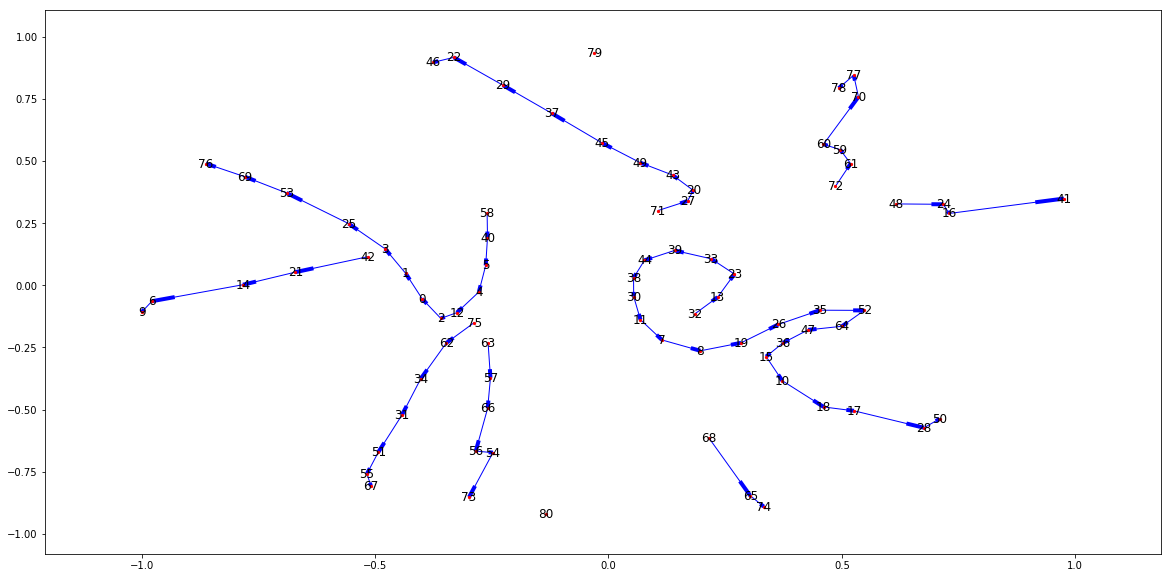

In [162]:

pairs, G = to_graph(np.copy(graph), 70)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=5)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()

In [133]:
G.

TypeError: get_edge_data() missing 2 required positional arguments: 'u' and 'v'